# HW 5-2. Tree-based method

##### Execute the following statement in terminal.
sudo pip3 install seaborn

sudo apt-get install python3-pydot

sudo pip3 install pydotplus

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import pydotplus
from sklearn import tree

from IPython.display import Image, display

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import  RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    display(Image(graph.create_png()))

## Regression Tree

In [3]:
df = pd.read_csv('Hitters.csv').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
Unnamed: 0    263 non-null object
AtBat         263 non-null int64
Hits          263 non-null int64
HmRun         263 non-null int64
Runs          263 non-null int64
RBI           263 non-null int64
Walks         263 non-null int64
Years         263 non-null int64
CAtBat        263 non-null int64
CHits         263 non-null int64
CHmRun        263 non-null int64
CRuns         263 non-null int64
CRBI          263 non-null int64
CWalks        263 non-null int64
League        263 non-null object
Division      263 non-null object
PutOuts       263 non-null int64
Assists       263 non-null int64
Errors        263 non-null int64
Salary        263 non-null float64
NewLeague     263 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 45.2+ KB


In [4]:
df.head()

          Unnamed: 0  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
1        -Alan Ashby    315    81      7    24   38     39     14    3449   
2       -Alvin Davis    479   130     18    66   72     76      3    1624   
3      -Andre Dawson    496   141     20    65   78     37     11    5628   
4  -Andres Galarraga    321    87     10    39   42     30      2     396   
5   -Alfredo Griffin    594   169      4    74   51     35     11    4408   

   CHits  CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  Assists  \
1    835      69    321   414     375      N        W      632       43   
2    457      63    224   266     263      A        W      880       82   
3   1575     225    828   838     354      N        E      200       11   
4    101      12     48    46      33      N        E      805       40   
5   1133      19    501   336     194      A        W      282      421   

   Errors  Salary NewLeague  
1      10   475.0         N  
2      14   480.0         

Text(0.5,0,'Log(Salary)')

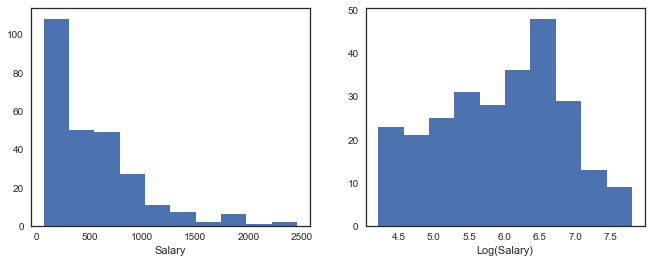

In [5]:
X = df[['Years', 'Hits']].as_matrix()
y = np.log(df.Salary.as_matrix())

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))
ax1.hist(df.Salary.as_matrix())
ax1.set_xlabel('Salary')
ax2.hist(y)
ax2.set_xlabel('Log(Salary)')

### See here. http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

Implement a simple decision tree that is the same as the one from lecture note.('page 4 of lecture 8')

Consider **max_depth** and **max_leaf_nodes**.

i.e. What is the maximum depth and the number of leaf nodes?

In [6]:
def simple_reg(X, y):
    
    regr = None
    # ====================== YOUR CODE HERE ======================
    # Instructions: Use DecisionTreeRegressor Function in scikit-learn package.
    #               Set the max_depth and max_leaf_nodes according to the lecture note.
    #               Fit your model to the data and return the model.
    regr = DecisionTreeRegressor(max_depth=2, max_leaf_nodes=3)
    regr.fit(X, y)
    
    # ============================================================
    
    return regr

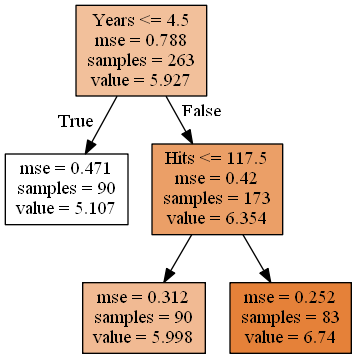

In [7]:
regr = simple_reg(X, y)
features = ['Years', 'Hits']
print_tree(regr, features)

Text(11,170,'R3')

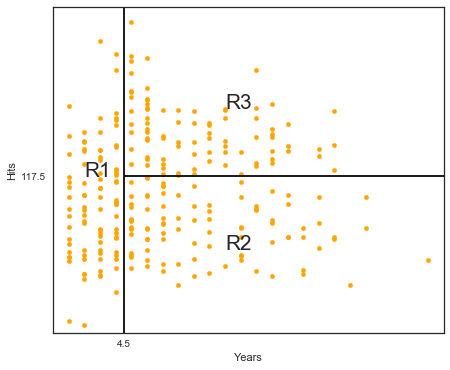

In [8]:
df.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([4.5])
plt.yticks([117.5])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large')

### Fitting a regression tree

Let's do a tree-based regression with Boston Dataset.

The dataset details can be found here:
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [9]:
boston_df = pd.read_csv('Boston.csv')
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [10]:
boston_df.head()

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

We are using 

**MEDV** - Median value of owner-occupied homes in $1000's

for the target values

The others are used as the input features for regression.

In [11]:
X_b = boston_df.drop('medv', axis=1)
y_b = boston_df.medv

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, train_size=0.5, random_state=0)

C:\Users\home\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
def boston_reg(X, y):
    
    regr = None
    # ====================== YOUR CODE HERE ======================
    # Instructions: Use DecisionTreeRegressor Function in scikit-learn package.
    #               Set the max_depth to 3
    #               Fit your model to the data and return the model.
    #boston = load_boston()
    regr = DecisionTreeRegressor(max_depth=3)
    regr.fit(X, y)
    
    
    # ============================================================
    
    return regr

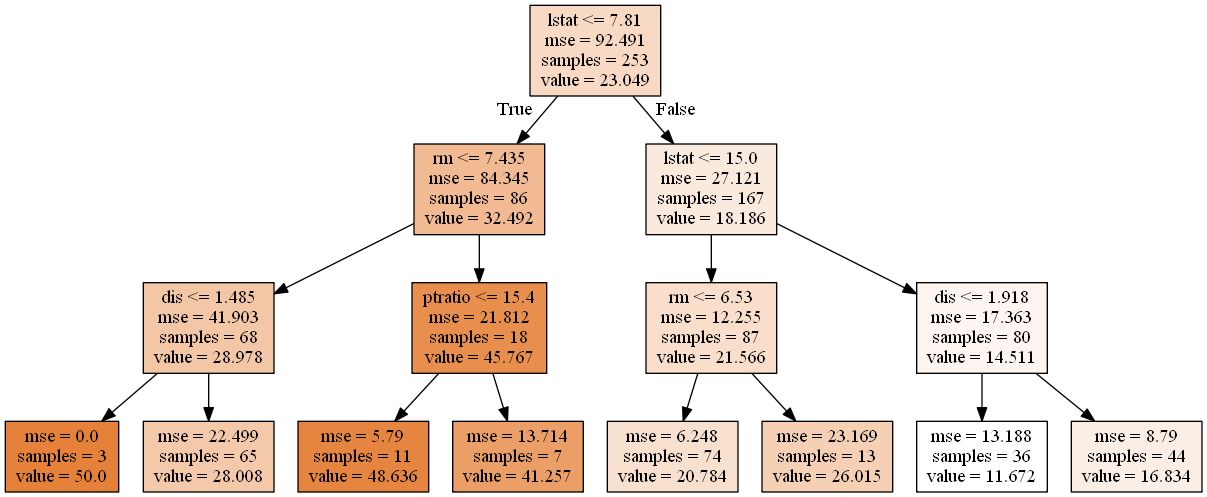

In [13]:
regr1 = boston_reg(X_train_b, y_train_b)
print_tree(regr1, X_b.columns)

Text(0,0.5,'y_test')

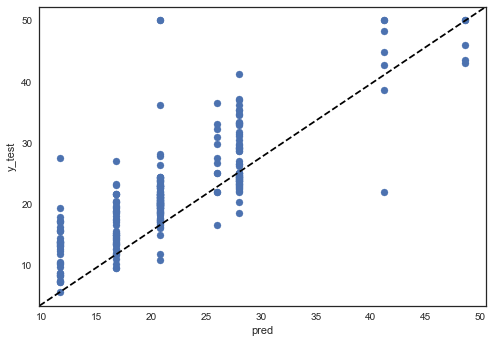

In [14]:
pred = regr1.predict(X_test_b)

plt.scatter(pred, y_test_b, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [15]:
mean_squared_error(y_test_b, pred)

26.02323085009744

## Classification Tree
Binary classification with **Heart data**

In [16]:
df2 = pd.read_csv('Heart.csv').drop('Unnamed: 0', axis=1).dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
Age          297 non-null int64
Sex          297 non-null int64
ChestPain    297 non-null object
RestBP       297 non-null int64
Chol         297 non-null int64
Fbs          297 non-null int64
RestECG      297 non-null int64
MaxHR        297 non-null int64
ExAng        297 non-null int64
Oldpeak      297 non-null float64
Slope        297 non-null int64
Ca           297 non-null float64
Thal         297 non-null object
AHD          297 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [17]:
df2.head()

   Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   
3   37    1    nonanginal     130   250    0        0    187      0      3.5   
4   41    0    nontypical     130   204    0        2    172      0      1.4   

   Slope   Ca        Thal  AHD  
0      3  0.0       fixed   No  
1      2  3.0      normal  Yes  
2      2  2.0  reversable  Yes  
3      3  0.0      normal   No  
4      1  0.0      normal   No  

In [18]:
df2.ChestPain = pd.factorize(df2.ChestPain)[0]
df2.Thal = pd.factorize(df2.Thal)[0]

In [19]:
X_h = df2.drop('AHD', axis=1)
y_h = pd.factorize(df2.AHD)[0]


### See here. http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [20]:
def heart_clf(X, y):
    
    clf = None
    # ====================== YOUR CODE HERE ======================
    # Instructions: Use DecisionTreeClassifier Function in scikit-learn.
    #               Set the max_leaf_nodes to 9, and max_features to 3
    #               Fit your model to the data and return the model.
    clf = DecisionTreeClassifier(max_features  =3, max_leaf_nodes = 9)
    clf.fit(X, y)

    # ============================================================
    
    return clf

In [21]:
clf = heart_clf(X_h, y_h)
clf.score(X_h,y_h)

0.7811447811447811

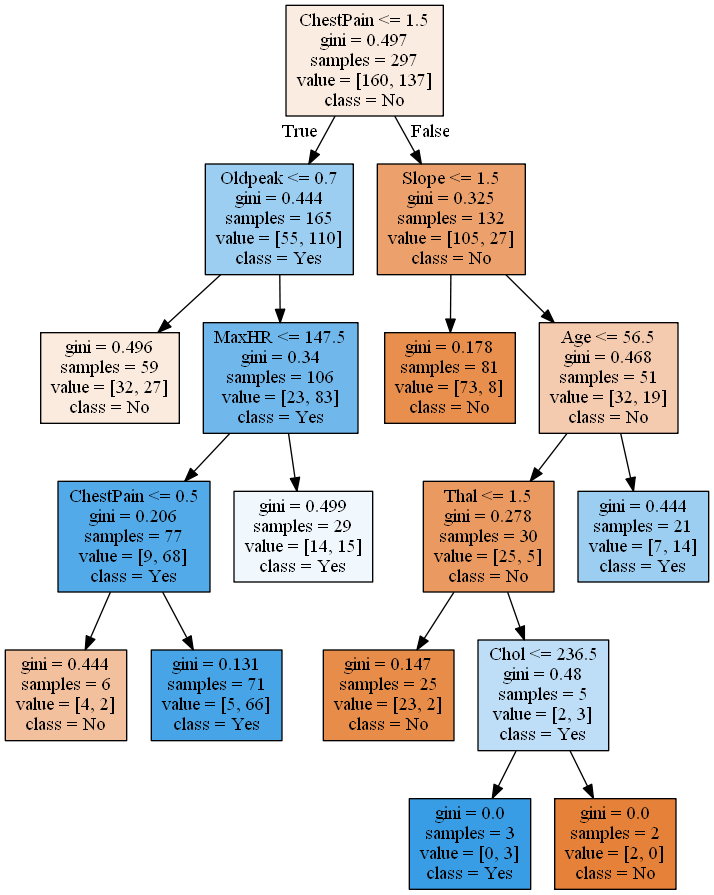

In [22]:
print_tree(estimator=clf, features=X_h.columns, class_names=['No', 'Yes'])

### Fitting a classification tree

Let's do a tree-based classification with Carseats dataset.

The dataset details can be found here:
https://www.rdocumentation.org/packages/ISLR/versions/1.2/topics/Carseats

In [23]:
df3 = pd.read_csv('Carseats.csv').drop('Unnamed: 0', axis=1)
df3.head()

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  

The sales would be regarded as **High** enough if the sales is larger than 8,

and we will use this value for the target label.

In [24]:
df3['High'] = df3.Sales.map(lambda x: 1 if x>8 else 0)
df3.ShelveLoc = pd.factorize(df3.ShelveLoc)[0]

df3.Urban = df3.Urban.map({'No':0, 'Yes':1})
df3.US = df3.US.map({'No':0, 'Yes':1})
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null int64
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null int64
US             400 non-null int64
High           400 non-null int64
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


In [25]:
df3.head(5)

   Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban  US  High  
0         17      1   1     1  
1         10      1   1     1  
2         12      1   1     1  
3         14      1   1     0  
4         13      1   0     0  

In [26]:
X_c = df3.drop(['Sales', 'High'], axis=1)
y_c = df3.High

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, train_size=0.5, random_state=0)

C:\Users\home\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [27]:
def carseat_clf(X, y):
    
    clf = None
    # ====================== YOUR CODE HERE ======================
    # Instructions: Use DecisionTreeClassifier Function in scikit-learn.
    #               Set the max_depth to 6
    #               Fit your model to the data and return the model.
    clf = DecisionTreeClassifier(max_depth = 6)
    clf.fit(X, y)

    
    
    
    # ============================================================
    
    return clf

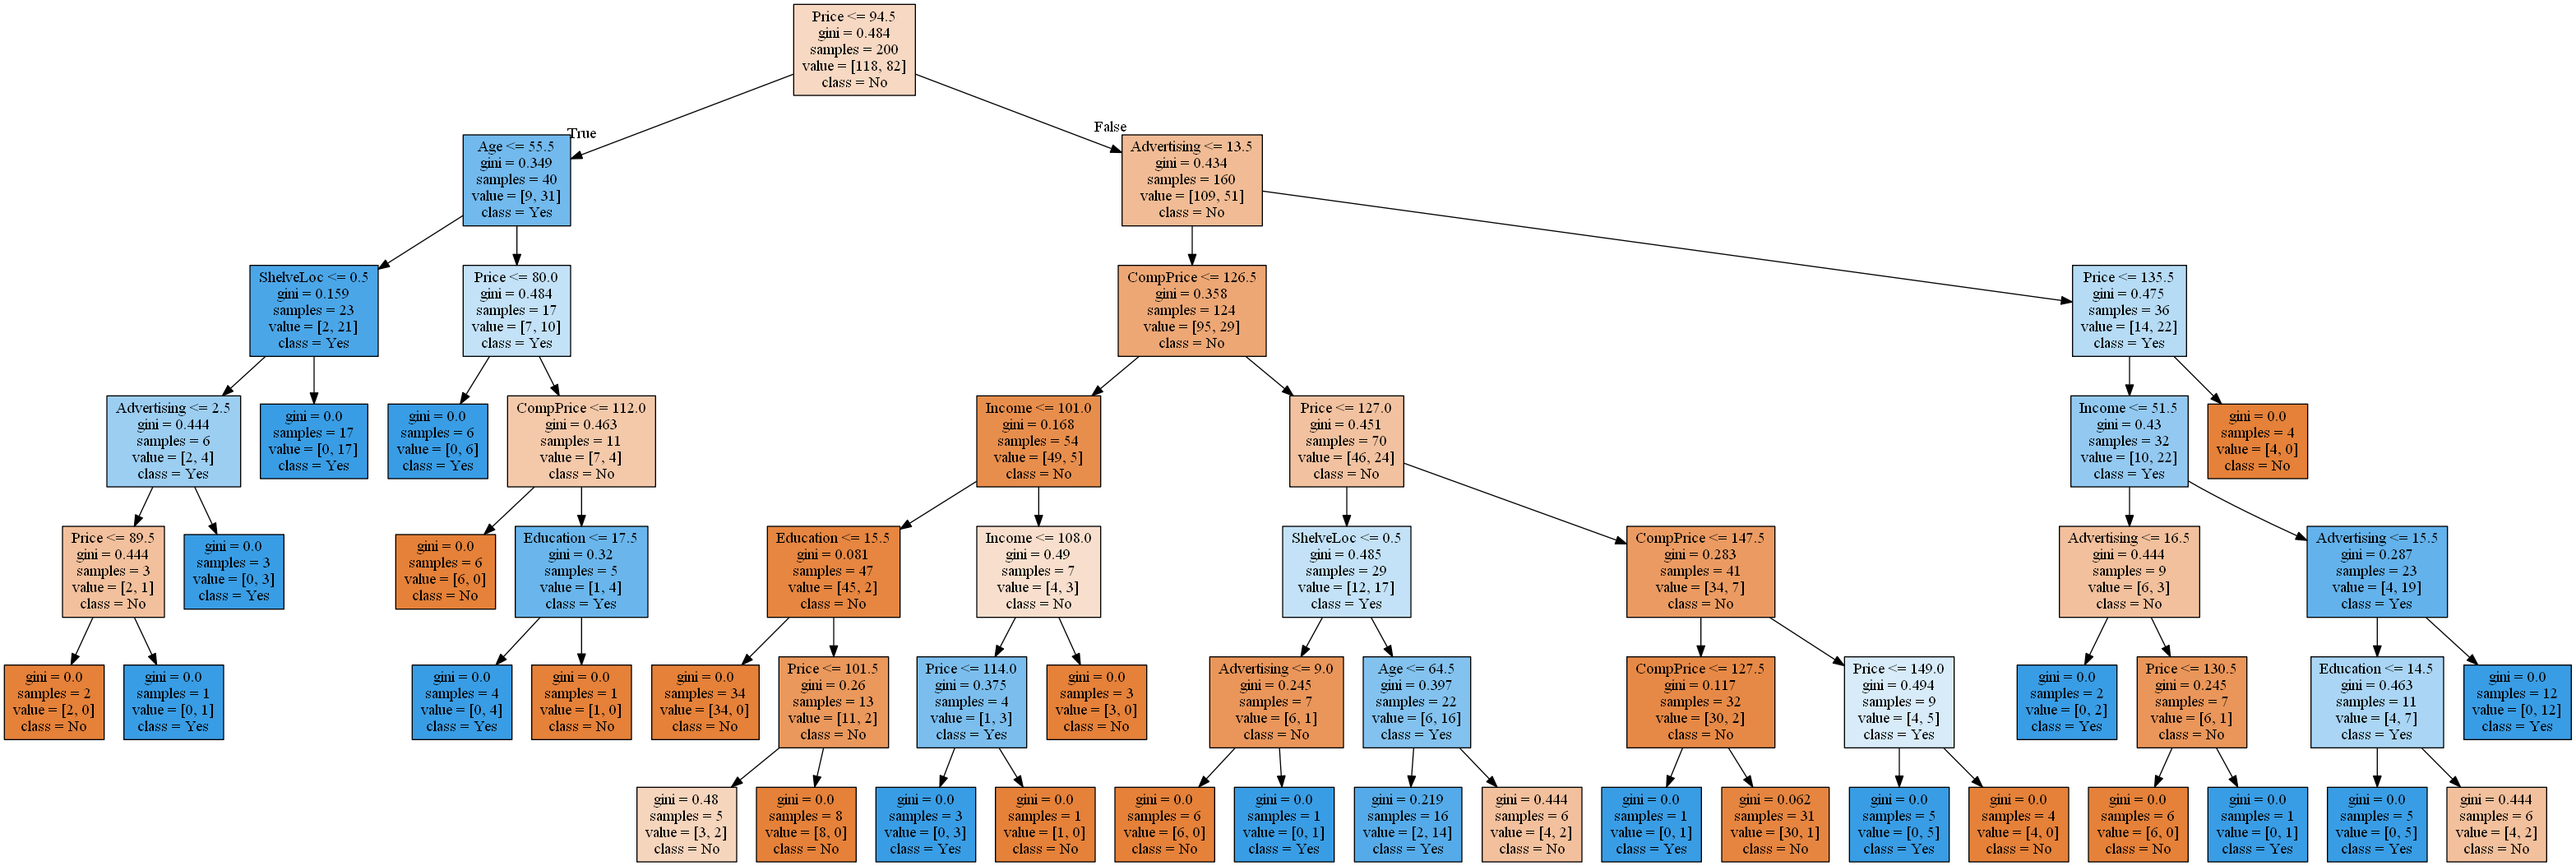

In [28]:
clf = carseat_clf(X_train_c, y_train_c)
print_tree(clf, features=X_c.columns, class_names=['No', 'Yes'])

Text(0.5,1,'Confusion Matrix on Test Data')

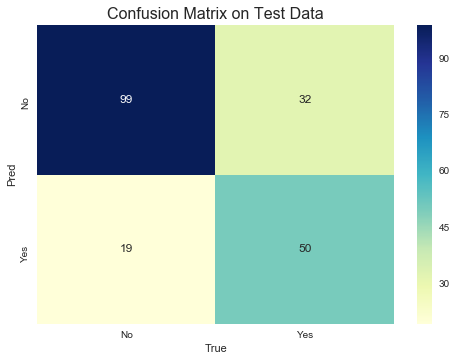

In [29]:
pred = clf.predict(X_test_c)
cm = pd.DataFrame(confusion_matrix(y_test_c, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Pred'
cm.columns.name = 'True'

sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.title('Confusion Matrix on Test Data', fontsize=16)

In [30]:
print(classification_report(y_test_c, pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       118
           1       0.72      0.61      0.66        82

   micro avg       0.74      0.74      0.74       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.74      0.74      0.74       200



## Bagging & Random Forest
Using the boston dataset again, let's try a regression in a bagging & random forest way.

In [31]:
# There are 13 features in the dataset
X_b.shape

(506, 13)

### See here. http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

#### Bagging
For bagging, we generate B different bootstrapped training data using all features,

and average the prediction.

In [32]:
def boston_reg_bag(X, y, n_trees=50):
    
    regr = None
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Use RandomForestRegressor Function in scikit-learn
    #               Set the max_features to 13 for bagging, 
    #               and n_esimators to n_trees.
    #               Fit your model to the data and return the model.
    regr = RandomForestRegressor(max_features=13, n_estimators=n_trees)
    regr.fit(X, y)
    
    
    
    # ============================================================
    
    return regr

Text(0,0.5,'y_test')

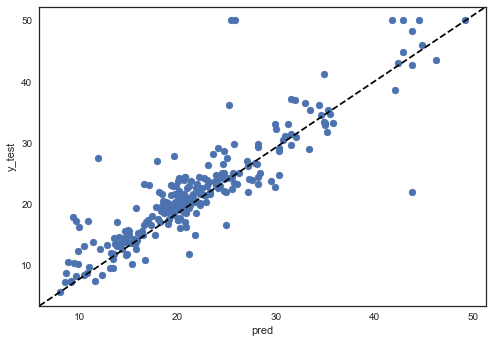

In [33]:
regr2 = boston_reg_bag(X_train_b, y_train_b)
pred = regr2.predict(X_test_b)

plt.scatter(pred, y_test_b, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [34]:
mean_squared_error(y_test_b, pred)

15.951740806324114

Text(0,0.5,'MSE')

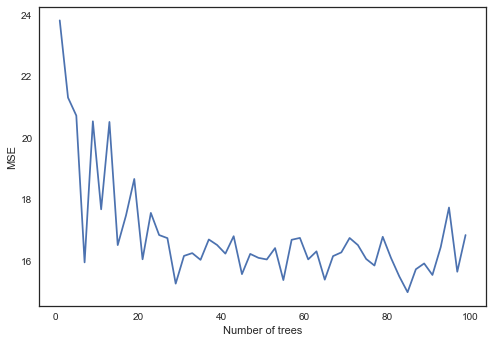

In [35]:
n_trees = np.arange(1, 100, 2)
loss_his = []
for num in n_trees:
    regr_val = boston_reg_bag(X_train_b, y_train_b, n_trees=num)
    pred_val = regr_val.predict(X_test_b)
    loss_his.append(mean_squared_error(y_test_b, pred_val))

plt.plot(n_trees, loss_his)
plt.xlabel('Number of trees')
plt.ylabel('MSE')

Importance of each feature. The higher, the more important the feature.

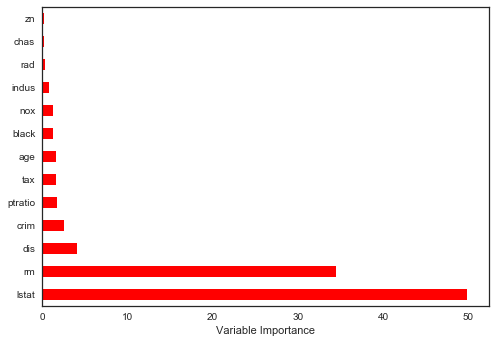

In [36]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X_b.columns)
Importance.sort_values('Importance', axis=0, ascending=False).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

#### Random forest

For each split in a tree, randomly select **m** features out of d

Typically, m = $\sqrt{d}$

In [37]:
def boston_reg_rf(X, y, n_trees=50):
    
    regr = None
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Use RandomForestRegressor Function in scikit-learn
    #               Set the max_features to sqrt for random forest, 
    #               and n_esimators to n_trees.
    #               Fit your model to the data and return the model.

    regr = RandomForestRegressor(max_features=int(float(np.sqrt(13))), n_estimators=n_trees)
    regr.fit(X, y)
    
    
    
    # ============================================================
    
    return regr

Text(0,0.5,'y_test')

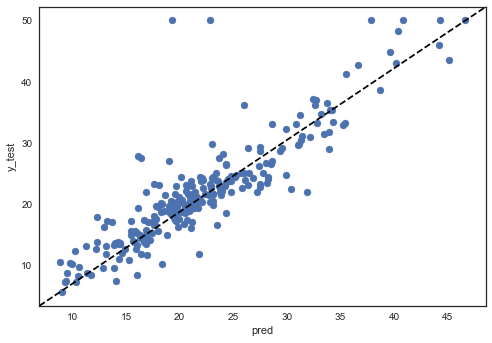

In [38]:
regr3 = boston_reg_rf(X_train_b, y_train_b)
pred = regr3.predict(X_test_b)

plt.scatter(pred, y_test_b, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [39]:
mean_squared_error(y_test_b, pred)

17.062246830039527

Text(0,0.5,'MSE')

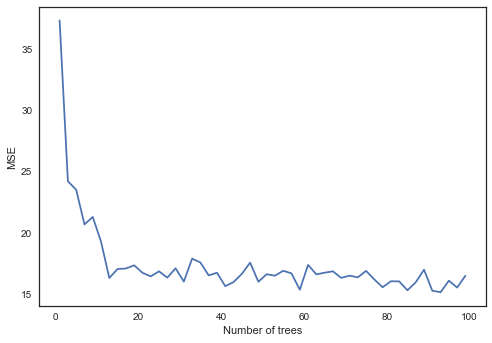

In [40]:
n_trees = np.arange(1, 100, 2)
loss_his = []
for num in n_trees:
    regr_val = boston_reg_rf(X_train_b, y_train_b, n_trees=num)
    pred_val = regr_val.predict(X_test_b)
    loss_his.append(mean_squared_error(y_test_b, pred_val))

plt.plot(n_trees, loss_his)
plt.xlabel('Number of trees')
plt.ylabel('MSE')

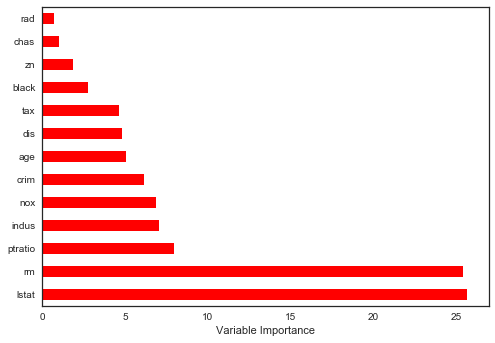

In [41]:
Importance = pd.DataFrame({'Importance':regr3.feature_importances_*100}, index=X_b.columns)
Importance.sort_values('Importance', axis=0, ascending=False).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None